# Exercise 2: Interpolation

You want to use your (still hypothetical) R wave detection algorithm to output heart rate. You can easily compute heart rate by taking the difference between successive R wave peak times because the R wave corresponds to a heart beat. The heart rate is then just the reciprocal of the inter-beat-interval time. 

You find a dataset that has an ECG signal and a reference heart rate datastream. After running your algorithm on the dataset, you have a series of R wave peak times. The heart rates that you get from the inter-beat-interval times will be non-uniformly sequenced because the heart beats at non-uniform intervals. The reference heart rate is uniformly sampled, however. To compare these two datastreams you will need to interpolate your heart rate onto the reference stream first.

The data you need is stored in the `npz` file as follows:  
 - `est_r_peaks` - the timestamps in seconds of the r peaks detected by your algorithm
 - `ref_ts` - the timestamps in seconds of the reference heart rate
 - `ref_hr` - the reference heart rate values in beats per minute

You must first derive heart rate from your sequence of R peaks. Then interpolate your estimate heart rate stream to match up with the reference stream. Finally, compute the mean absolute error between the reference stream your estimate heart rate. The mean absolute error is the average absolute difference between each estimate heart rate and its reference value.

## Imports

In [20]:
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [2]:
npz = np.load("./exercise2.npz")
est_r_peaks = npz['est_r_peaks']
ref_ts = npz['ref_ts']
ref_hr = npz['ref_hr']

In [3]:
est_r_peaks.shape, ref_ts.shape, ref_hr.shape

((660,), (148,), (148,))

## Estimate heart rate

In [15]:
## Your Code Goes Here
est_ts = est_r_peaks[1:]
est_hr = 1 / np.diff(est_ts)*60

## Interpolate
Interpolate the heart rate estimates to align with the reference.

In [17]:
## Your Code Goes Here
interp_est_hr = np.interp(ref_ts, est_ts[1:], est_hr)

## Compute MAE

In [18]:
## Your Code Goes Here
mae = np.mean(np.abs(interp_est_hr - ref_hr))
mae

3.9347459880060383

## Plot the two signals

In [26]:
import mpld3
mpld3.enable_notebook()

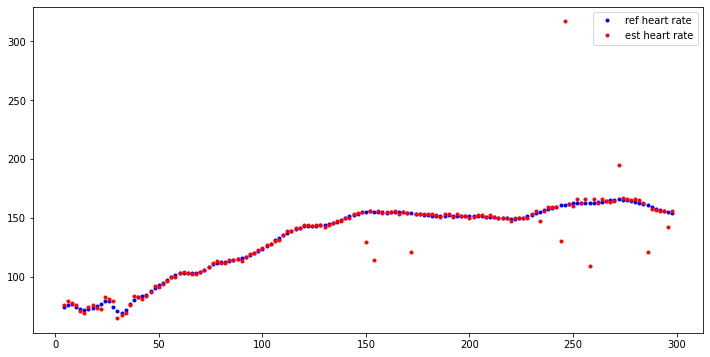

In [27]:
plt.figure(figsize=(12, 6))

plt.plot(ref_ts, ref_hr, 'b.', label = 'ref heart rate')
plt.legend()

plt.plot(ref_ts, interp_est_hr, 'r.', label = 'est heart rate')
plt.legend()